In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
dataset = pd.read_csv("datadiabetes.csv")
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
x = sc.fit_transform(x)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
#Define the model
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Using TensorFlow backend.


In [6]:
#Comoile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
#Fit the model
history = model.fit(x_train,y_train,epochs=100,batch_size=50,validation_data=(x_test,y_test))

Train on 614 samples, validate on 154 samples
Epoch 1/100
614/614 [==============================] - 3s 5ms/step - loss: 0.7213 - accuracy: 0.4316 - val_loss: 0.7048 - val_accuracy: 0.4351
Epoch 2/100
614/614 [==============================] - 0s 54us/step - loss: 0.7050 - accuracy: 0.4951 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 3/100
614/614 [==============================] - 0s 68us/step - loss: 0.6927 - accuracy: 0.5635 - val_loss: 0.6808 - val_accuracy: 0.5519
Epoch 4/100
614/614 [==============================] - 0s 59us/step - loss: 0.6838 - accuracy: 0.6173 - val_loss: 0.6725 - val_accuracy: 0.6104
Epoch 5/100
614/614 [==============================] - 0s 51us/step - loss: 0.6755 - accuracy: 0.6466 - val_loss: 0.6646 - val_accuracy: 0.6429
Epoch 6/100
614/614 [==============================] - 0s 56us/step - loss: 0.6675 - accuracy: 0.6596 - val_loss: 0.6565 - val_accuracy: 0.6558
Epoch 7/100
614/614 [==============================] - 0s 64us/step - loss: 0.6580 - accura

614/614 [==============================] - 0s 80us/step - loss: 0.4316 - accuracy: 0.7883 - val_loss: 0.4745 - val_accuracy: 0.7792
Epoch 58/100
614/614 [==============================] - 0s 80us/step - loss: 0.4305 - accuracy: 0.7866 - val_loss: 0.4748 - val_accuracy: 0.7792
Epoch 59/100
614/614 [==============================] - 0s 56us/step - loss: 0.4297 - accuracy: 0.7866 - val_loss: 0.4747 - val_accuracy: 0.7792
Epoch 60/100
614/614 [==============================] - 0s 51us/step - loss: 0.4287 - accuracy: 0.7883 - val_loss: 0.4742 - val_accuracy: 0.7792
Epoch 61/100
614/614 [==============================] - 0s 52us/step - loss: 0.4279 - accuracy: 0.7866 - val_loss: 0.4749 - val_accuracy: 0.7857
Epoch 62/100
614/614 [==============================] - 0s 56us/step - loss: 0.4271 - accuracy: 0.7866 - val_loss: 0.4756 - val_accuracy: 0.7857
Epoch 63/100
614/614 [==============================] - 0s 52us/step - loss: 0.4263 - accuracy: 0.7866 - val_loss: 0.4755 - val_accuracy: 0.779

In [8]:
#Evaluate the Keras Model
_,accuracy = model.evaluate(x,y)
print("acuuracy: %.2f" % (accuracy*100))

768/768 [==============================] - 0s 34us/step
acuuracy: 80.34


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


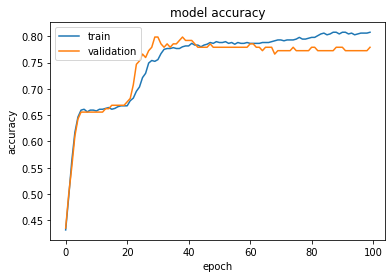

In [9]:
#Visualization of Accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc= 'upper left')
plt.show()

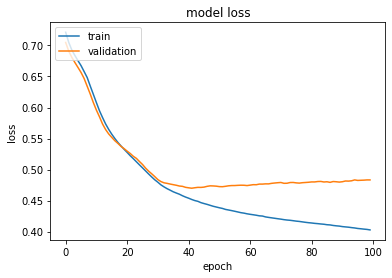

In [10]:
#Visualization of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc= 'upper left')
plt.show()

In [11]:
keras_file="linear.h5"
keras.models.save_model(model,keras_file)

In [30]:
#converter = tf.compat.v1.lite.TFLiteConverter.from_keras_model_file(keras_file)
#converter.experimental_new_converter = True
#tflite_model = converter.convert()
#open("linear.tflite", "wb").write(tflite_model)

2480

In [26]:
import tensorflow as tf

model = tf.keras.models.load_model('linear.h5')

# Save the model.
export_dir = "/Users/DELL/Desktop/practice/frontend/keras"
tf.saved_model.save(model, export_dir)

# Load model and get the concrete function.
model = tf.saved_model.load(export_dir)
concrete_func = model.signatures[
  tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

# Convert the model.
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
tflite_model = converter.convert()
open("converted_model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /Users/DELL/Desktop/practice/frontend/keras\assets


2932

In [ ]:
#model.save("model_diabetes.h5")
#Prediction
#test_diabetes = np.array([x_train[0]])
#result = model.predict_classes(test_diabetes)
#if result == 0:
#    print("No Diabetes")
#else:
#    print("Diabetes")
#p = 2
#glucose = 100
#bp= 120
#skin_thickness=40
#insulin=120
#bmi=33
#pd=0.77
#age=50
#test = np.array([[p,glucose,bp,skin_thickness,insulin,bmi,pd,age]])
#test_diabetes = np.array(test)
#if result == 0:
#    print("No Diabetes")
#else:
#    print("Diabetes")